## 1. Полиномиальная регрессия   


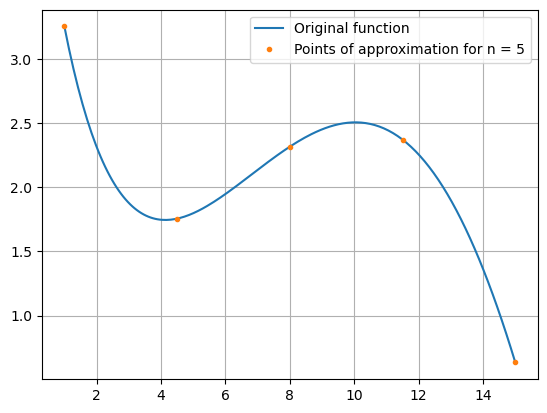

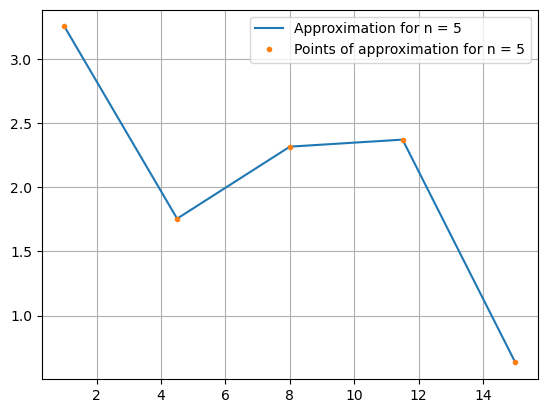

In [27]:
import numpy as np
import numpy.linalg
import numpy.random
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x/5) * np.exp(x/10) + 5 * np.exp(-1/2 * x)


def approx(n):
    a = np.linspace(1, 15, n)
    A = np.array([[x ** i for i in range(n)] for x in a])
    B = f(a)
    W = np.linalg.solve(A, B)
    result = np.array([sum([W[i] * x**i for i in range(n)]) for x in a])
    return result


xx_1 = np.linspace(1, 15, 200)
n = 5
xx_2 = np.linspace(1, 15, n)
plt.grid()
plt.plot(xx_1, f(xx_1), label = 'Original function')
plt.plot(xx_2, f(xx_2), marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

plt.grid()
plt.plot(xx_2, approx(n), label = f'Approximation for n = {n}')
plt.plot(xx_2, f(xx_2), marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

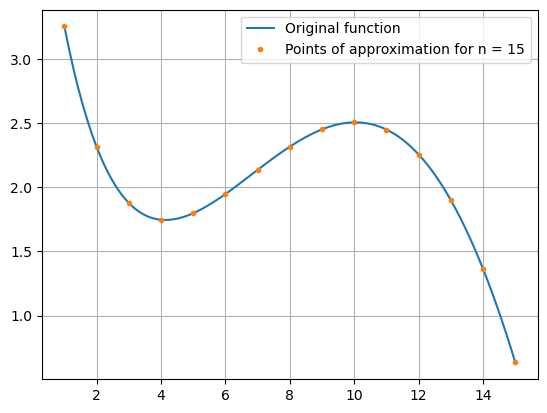

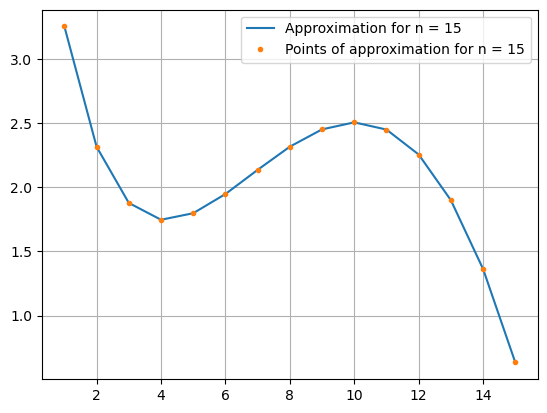

In [26]:
xx_1 = np.linspace(1, 15, 200)
n = 15
xx_2 = np.linspace(1, 15, n)
plt.grid()
plt.plot(xx_1, f(xx_1), label = 'Original function')
plt.plot(xx_2, f(xx_2), marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

plt.grid()
plt.plot(xx_2, approx(n), label = f'Approximation for n = {n}')
plt.plot(xx_2, f(xx_2), marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

## 2. Полиномиальная регрессия с зашумлённым данным

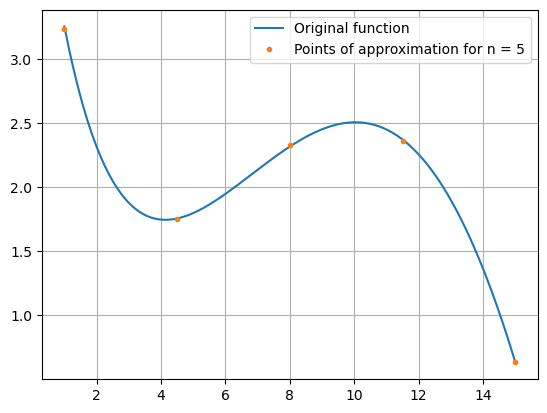

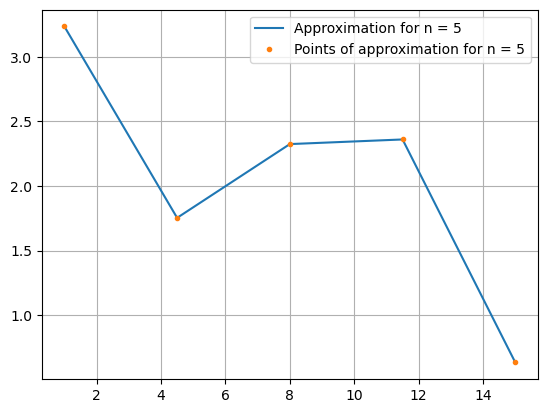

In [25]:
def noize_gen(n):
    a = np.linspace(1, 15, n)
    A = np.array([[x ** i for i in range(n)] for x in a])
    B = f(a)
    for i in range(len(B)):
        B[i] += np.random.normal(0, 0.01)
    W = np.linalg.solve(A, B)
    result = np.array([sum([W[i] * x**i for i in range(n)]) for x in a])
    return result, B


xx_1 = np.linspace(1, 15, 200)
n = 5
xx_2 = np.linspace(1, 15, n)
yy = noize_gen(n)
plt.grid()
plt.plot(xx_1, f(xx_1), label = 'Original function')
plt.plot(xx_2, yy[1], marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

plt.grid()
plt.plot(xx_2, yy[0], label = f'Approximation for n = {n}')
plt.plot(xx_2, yy[1], marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

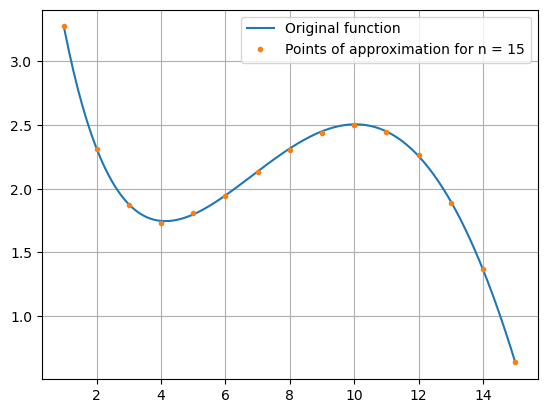

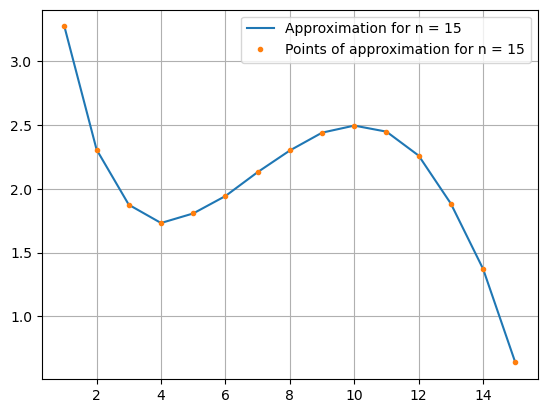

In [24]:
xx_1 = np.linspace(1, 15, 200)
n = 15
xx_2 = np.linspace(1, 15, n)
yy = noize_gen(n)
plt.grid()
plt.plot(xx_1, f(xx_1), label = 'Original function')
plt.plot(xx_2, yy[1], marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

plt.grid()
plt.plot(xx_2, yy[0], label = f'Approximation for n = {n}')
plt.plot(xx_2, yy[1], marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

## 3. Метод наименьших квадратов 

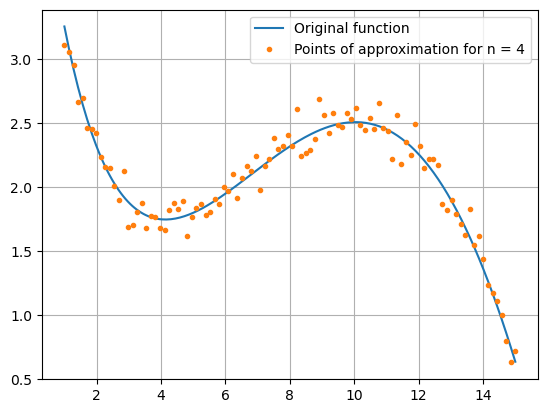

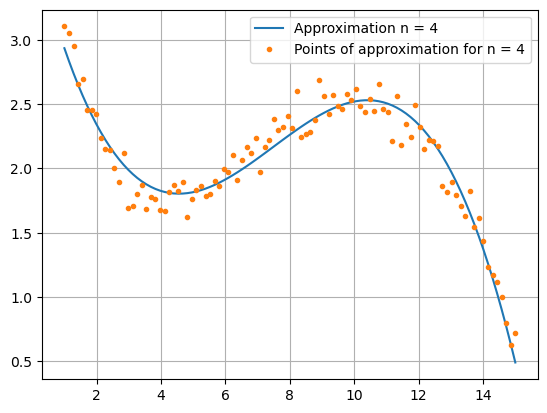

In [31]:
def lls(n):
    N = 100
    a = np.linspace(1, 15, N)
    A = np.array([[x ** i for i in range(n)] for x in a])
    B = f(a)
    for i in range(len(B)):
        B[i] += np.random.normal(0, 0.1)
    W, r1, r2, r3 = np.linalg.lstsq(A, B, rcond=None)
    result = np.array([sum([W[i] * x**i for i in range(n)]) for x in a])
    return result, B


xx = np.linspace(1, 15, 200)
N = 100
xx2 = np.linspace(1, 15, N)
n = 4 
yy = lls(n)
plt.grid()
plt.plot(xx, f(xx), label = 'Original function')
plt.plot(xx2, yy[1], marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

plt.grid()
plt.plot(xx2, yy[0], label = f'Approximation n = {n}')
plt.plot(xx2, yy[1], marker = '.', linestyle = '', label = f'Points of approximation for n = {n}')
plt.legend()
plt.show()

# Вывод

### Полиномиальная регрессия: 
Чем больше точек, тем лучше приближение

### Полиномиальная регрессия с зашумлённым данным:
При больших n аппроксимация сильно расходится с изначальной функцией, при маленьких n все хорошо.

### Метод наименьших квадратов:
Аппроксимирует достаточно точно как при маленьких n, так и при сильном шуме.